<h1 style='color:Red' align="center">Language Detection System </h1>

In [47]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pickle
warnings.simplefilter("ignore")

In [2]:
data = pd.read_csv("fd.csv")
data.head(50)

,Text,Language
0,نيتشر (بالإنجليزية: Nature)‏ قد تعني: تعديل...,Arabic
1,ويكيبيديا هي موسوعة يمكن لأي مستخدم تعديل وتحر...,Arabic
2,في مارس 2009 كان في ويكيبيديا 15 مليون مقالة ت...,Arabic
3,في يوم 17 أغسطس، 2009: وصلت ويكيبيديا الإنجليز...,Arabic
4,[8] تكتب المقالات تعاونيًا بواسطة متطوعين من ح...,Arabic
5,شهرة ويكيبيديا تنمو بثبات منذ بداية عملها.,Arabic
6,ويكيبيديا من الإنجليزية ويكيبيديا هي اختصار لك...,Arabic
7,تنتشر خوادم ويكيبيديا الرئيسية في تامبا، فلوري...,Arabic
8,يعد ويكيبيديا من أشهر عشرة مواقع على الإنترنت ...,Arabic
9,[9] نتيجة لطبيعة ويكيبيديا التي تسمح لأي مستخد...,Arabic


In [48]:
##  <span style='color:Purple'> Now Let's take some insites about data </span>

In [3]:
data["Language"].value_counts()

Malayalam     594
Russian       581
English       570
Italian       555
Portugeese    552
Dutch         546
Chinese       535
Arabic        534
Sweedish      517
Estonian      505
Persian       480
Turkish       474
German        470
Tamil         469
Korean        455
Japanese      446
Pushto        441
Indonesian    434
Danish        428
Urdu          413
French        406
Spanish       404
Kannada       369
Greek         365
Thai          359
Latin         352
Romanian      332
Hindi          62
Name: Language, dtype: int64

In [4]:
X = data["Text"]
y = data["Language"]

In [5]:
X.shape

(12648,)

In [6]:
y.shape

(12648,)

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
# creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape # (10337, 39419)

(12648, 110736)

## <span style='color:Purple'> Splitting the data set into train and test </span>

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.21)

In [11]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)


MultinomialNB()

In [12]:
y_pred = model.predict(x_test)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [14]:
print("Accuracy is :",ac)

Accuracy is : 0.9273616861121565


## <span style='color:Purple'> Generating the Classification Report </span>

In [15]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       103
           1       0.89      0.46      0.61       102
           2       0.97      0.94      0.95        95
           3       0.98      0.95      0.97       128
           4       0.83      0.97      0.90       124
           5       0.94      0.98      0.96       112
           6       0.97      0.97      0.97        99
           7       0.95      0.98      0.96        93
           8       1.00      0.97      0.99        76
           9       1.00      1.00      1.00        10
          10       0.90      0.98      0.94       101
          11       0.93      0.99      0.96       125
          12       0.97      0.41      0.57        96
          13       0.86      1.00      0.92        77
          14       1.00      0.95      0.98        87
          15       0.93      0.93      0.93        75
          16       0.57      1.00      0.73       115
          17       1.00    

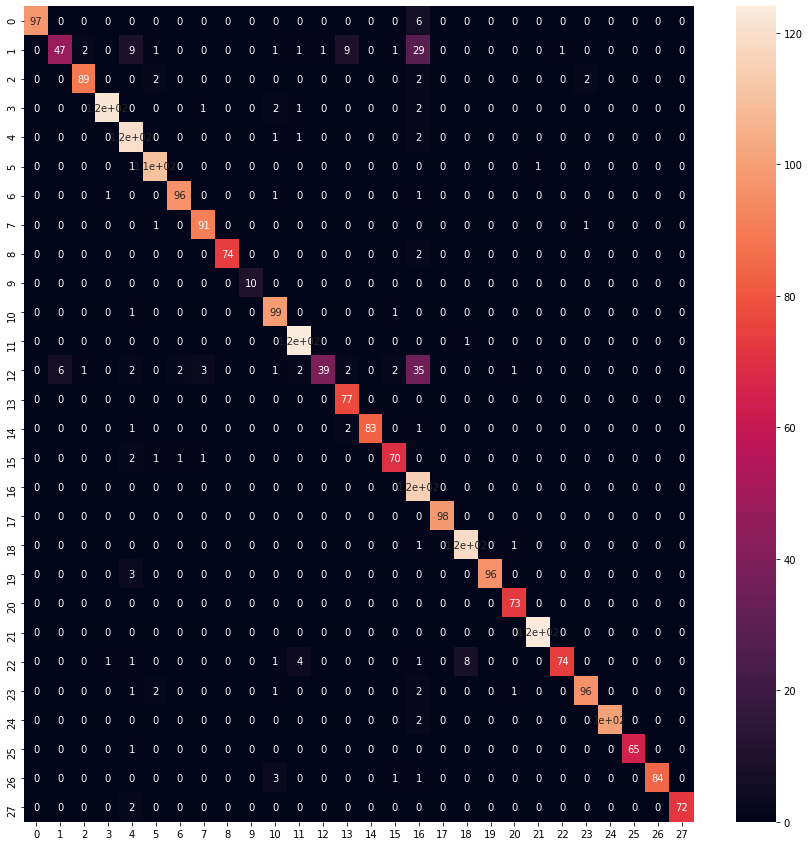

In [24]:
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot = True)
plt.show()

##  <span style='color:Purple'> Making predictions </span>

In [19]:
def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The langauge is in",lang[0]) # printing the language

In [22]:
# English
predict("India is my country")

The langauge is in English


In [25]:
# India
predict("भारत मेरा देश है")

The langauge is in Hindi


In [26]:
# Russian
predict("Индия - моя страна")

The langauge is in Russian


In [28]:
# Italin
predict("India è il mio paese")

The langauge is in Italian


In [29]:
# Sweedish
predict("Indien är mitt land")

The langauge is in Sweedish


In [34]:
# Dutch
predict("India is mijn land")

The langauge is in English


In [50]:
# Latin
predict("India patria mea est")

The langauge is in Latin


In [51]:
# German
predict("Indien ist mein Land")

The langauge is in German
